In [36]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [37]:
car_suffix = '_dissolved_inorganic_carbon_means_perday_alg2.pkl'

BR1 = 'BR_1st_2015'; BR2 = 'BR_2nd_2015'; BR3 = 'BR_3rd_2015'


LA3rr = 'LA3'
PI3rr = 'PI3'
PI3rr_old = 'PI3_old'

#var
BR1_var = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT//pickles/'+BR1+car_suffix , 'rb')) 
BR2_var = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT//pickles/'+BR2+car_suffix , 'rb')) 
BR3_var = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT//pickles/'+BR3+car_suffix , 'rb')) 


csize = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT//pickles/cellsize_alg2.pkl', 'rb'))
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

BR_var = np.zeros([40,365*3])
BR_var[:,0:365] = BR1_var
BR_var[:,365:2*365] = BR2_var
BR_var[:,2*365:3*365] = BR3_var

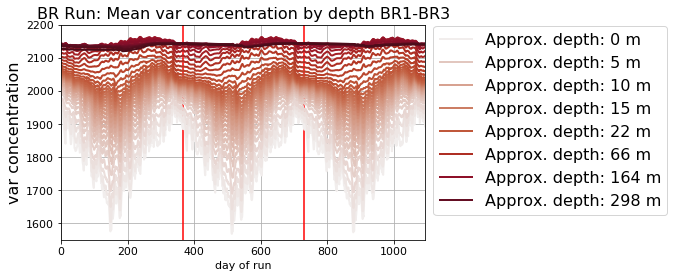

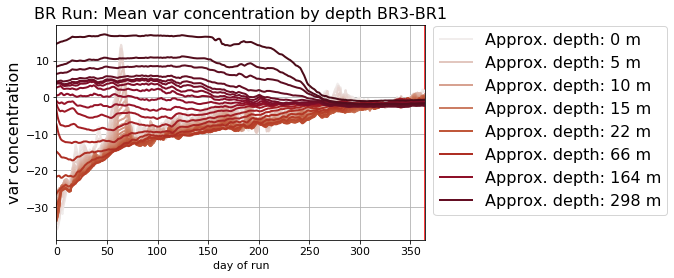

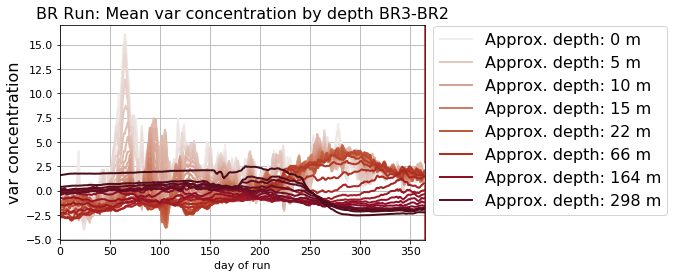

In [41]:
tcm = cm.amp
lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR1-BR3', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR3_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR3_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
#plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR3-BR1', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR3_var[i,:]-BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR3_var[i,:]-BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
#plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR3-BR2', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


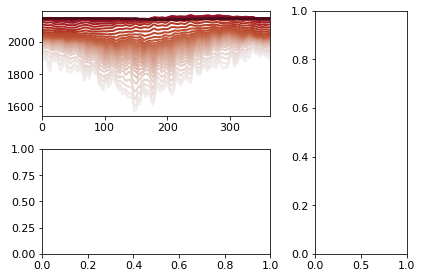

In [69]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(19*fact,8*fact))
grid = plt.GridSpec(2, 3)  # 2 rows 3 cols
ax1 = plt.subplot(grid[0, :2])  # top left

for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*i/40),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
#plt.ylim([1550,2200])


ax2 = plt.subplot(grid[1, :2])  # bottom left
ax2 = plt.subplot(grid[:2, 2])   # top right

fig.tight_layout()